In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers   # <-- ADDED (L1+L2)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # <-- ADDED (confusion matrix)
import numpy as np

Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualize the dataset

Target labels:  [4 0 2 6 2 0 6 4 1 5]


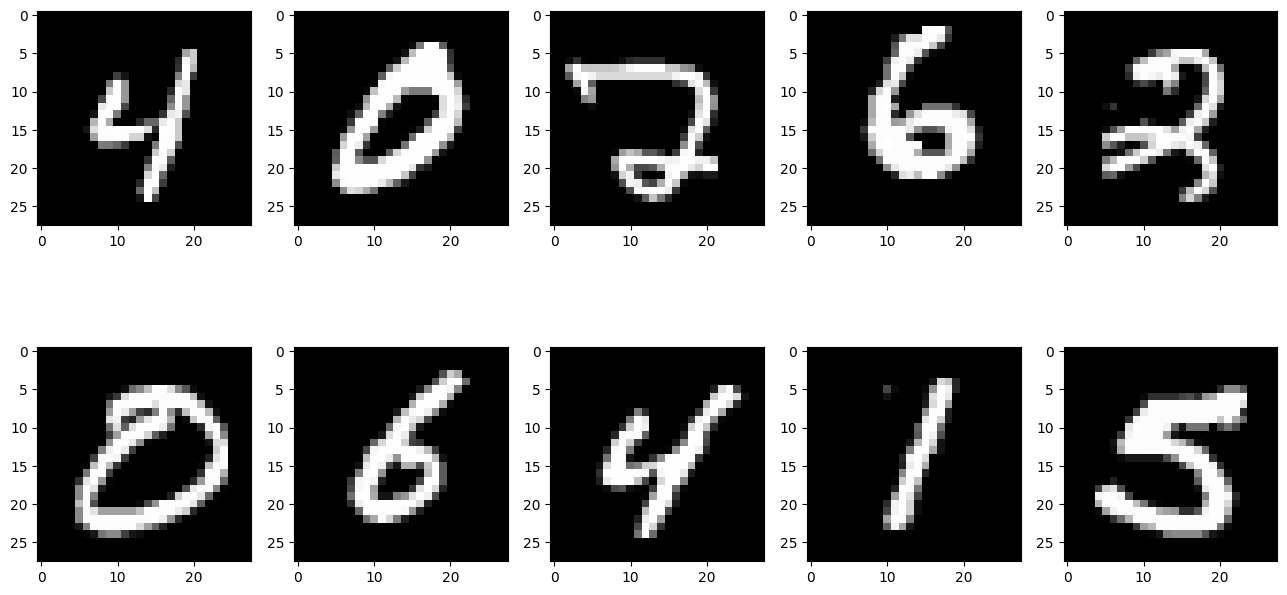

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [18]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# --- MINIMAL TUNING + REGULARIZATION (L1 + L2) ---
model.add(Dense(
    128, activation='relu',
    kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-4)
))
model.add(Dense(
    128, activation='relu',
    kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-4)
))
model.add(Dense(
    64, activation='relu',
    kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-4)
))
model.add(Dense(10, activation='softmax'))


optimizer = Adam(learning_rate=0.001)  # try 0.0005 if unstable
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])  # <-- use optimizer variable

In [19]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,898 (491.79 KB)

 Trainable params: 125,898 (491.79 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [20]:
train_info = model.fit(
    new_train_data, new_train_target,
    epochs=20,               # was 10
    batch_size=128,          # added
    validation_split=0.1,    # added
    verbose=1
)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8224 - loss: 0.6539 - val_accuracy: 0.9660 - val_loss: 0.1602
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9609 - loss: 0.1764 - val_accuracy: 0.9667 - val_loss: 0.1482
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9737 - loss: 0.1332 - val_accuracy: 0.9768 - val_loss: 0.1297
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9788 - loss: 0.1142 - val_accuracy: 0.9743 - val_loss: 0.1324
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9834 - loss: 0.0993 - val_accuracy: 0.9770 - val_loss: 0.1259
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9862 - loss: 0.0909 - val_accuracy: 0.9753 - val_loss: 0.1314
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9869 - loss: 0.0877 - val_accuracy: 0.9803 - val_loss: 0.1146
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9898 - loss: 0.0792 - val_accuracy: 0

Plot the loss and accuracy graphs

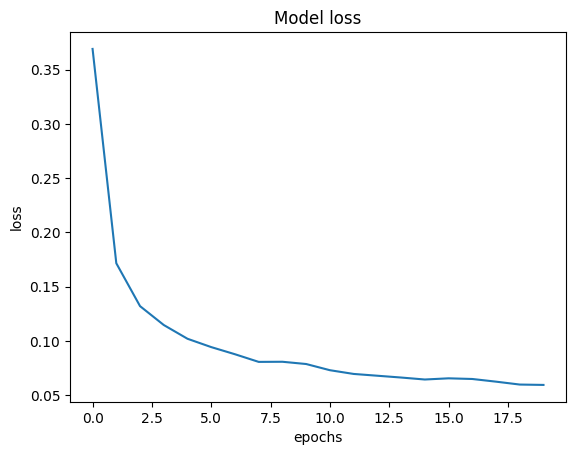

In [21]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

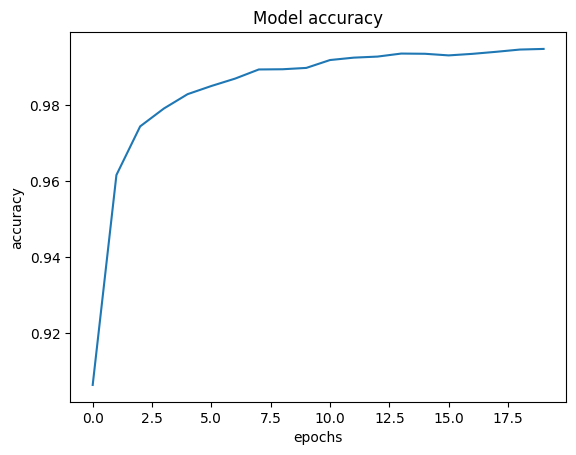

In [22]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [23]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.1323
Loss of the Test dataset is: 0.11372237652540207
Accuracy of the test dataset is: 0.9804999828338623


Save the model weights

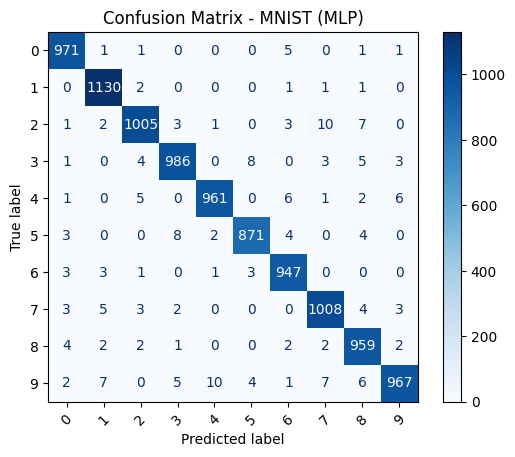

In [24]:
# --- (c) CONFUSION MATRIX (class-wise performance) ---
y_prob = model.predict(new_test_data, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(new_test_target, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix - MNIST (MLP)')
plt.show()

In [25]:
model.save_weights("MNIST_WEIGHTS_V1.weights.h5")